In [17]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [18]:
df = pd.read_csv('../Datasets/FinalData.csv')

In [19]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,NaN,NaN,NaN,20.879744,82.002744,6.502985,202.935536,rice
1,NaN,NaN,NaN,21.770462,80.319644,7.038096,226.655537,rice
2,NaN,NaN,NaN,23.004459,82.320763,7.840207,263.964248,rice
3,NaN,NaN,NaN,26.491096,80.158363,6.980401,242.864034,rice
4,NaN,NaN,NaN,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
df.size

17600

In [21]:
df.shape

(2200, 8)

In [22]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [25]:
acc = []
model = []

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [27]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  82.72727272727273
              precision    recall  f1-score   support

       apple       0.81      1.00      0.90        13
      banana       0.71      1.00      0.83        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.59      1.00      0.75        22
      cotton       1.00      0.30      0.46        20
      grapes       0.72      1.00      0.84        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       0.95      0.95      0.95        21
       mango       0.93      1.00      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.55      0.41

e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
dot_data = tree.export_graphviz(DecisionTree, out_file=None, 
                      feature_names=features.columns,  
                      class_names=df['label'].unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)  

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
score = cross_val_score(DecisionTree,features,target,cv=5)

In [31]:
score

array([0.82727273, 0.82954545, 0.83181818, 0.84090909, 0.83409091])

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DecisionTree_filename = '../APIs/Decision.pkl'
# Open the file to save as pkl file
DecisionTree_pkl = open(DecisionTree_filename, 'wb')
pickle.dump(DecisionTree, DecisionTree_pkl)
# Close the pickle instances
DecisionTree_pkl.close()

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming Xtrain and Xtest are DataFrames
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent' based on your needs

Xtrain_imputed = imputer.fit_transform(Xtrain)
Xtest_imputed = imputer.transform(Xtest)  # Use the same imputer for Xtest

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain_imputed, Ytrain)

predicted_values = NaiveBayes.predict(Xtest_imputed)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))


Naive Bayes's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       0.87      1.00      0.93        13
      banana       0.94      1.00      0.97        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      0.95      0.95        21
      coffee       0.91      0.95      0.93        22
      cotton       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.95      0.90      0.93        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.90      0.90 

e:\anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['N' 'P' 'K']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
e:\anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['N' 'P' 'K']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [34]:
#score = cross_val_score(NaiveBayes,features,target,cv=5)
#score



imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

NaiveBayes = GaussianNB()

# Perform cross-validation
score = cross_val_score(NaiveBayes, features_imputed, target, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", score)
print("Mean Accuracy:", np.mean(score))

e:\anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['N' 'P' 'K']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Cross-Validation Scores: [0.96818182 0.95       0.95909091 0.93636364 0.95227273]
Mean Accuracy: 0.9531818181818181


In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../APIs/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.svm import SVC 


imputer = SimpleImputer(strategy='mean')
Xtrain_imputed = imputer.fit_transform(Xtrain)
Xtest_imputed = imputer.transform(Xtest)

# Standardize the data
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_imputed)
Xtest_scaled = scaler.transform(Xtest_imputed)

# Create and train the SVM model
SVM = SVC(gamma='auto')
SVM.fit(Xtrain_scaled, Ytrain)

# Make predictions on the test set
predicted_values = SVM.predict(Xtest_scaled)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
print("SVM's Accuracy is:", accuracy)

# Display classification report
print(classification_report(Ytest, predicted_values))

e:\anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['N' 'P' 'K']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
e:\anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['N' 'P' 'K']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


SVM's Accuracy is: 0.9
              precision    recall  f1-score   support

       apple       0.87      1.00      0.93        13
      banana       0.94      1.00      0.97        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      0.95      0.93        21
      coffee       0.95      0.86      0.90        22
      cotton       0.90      0.95      0.93        20
      grapes       1.00      0.83      0.91        18
        jute       0.79      0.96      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.86      0.86      0.86        21
       mango       0.84      1.00      0.91        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       0.96      0.96      0.96        24
   muskmelon       0.96      1.00      0.98        23
      orange       0.92      0.83      0.87        29
    

In [39]:
score = cross_val_score(SVM,features,target,cv=5)
score

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "e:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\anaconda\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "e:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "e:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "e:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [40]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
SVM_filename = '../APIs/SVM.pkl'
# Open the file to save as pkl file
SVM_pkl = open(SVM_filename, 'wb')
pickle.dump(SVM, SVM_pkl)
# Close the pickle instances
SVM_pkl.close()

In [41]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
score = cross_val_score(LogReg,features,target,cv=5)
score

C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.93409091, 0.96590909, 0.95909091, 0.94090909, 0.96136364])

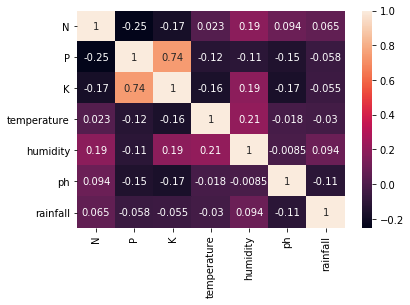

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [42]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LogReg_filename = '../APIs/LogReg.pkl'
# Open the file to save as pkl file
LogReg_pkl = open(LogReg_filename, 'wb')
pickle.dump(LogReg, LogReg_pkl)
# Close the pickle instances
LogReg_pkl.close()

In [44]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98409091, 0.99772727, 0.99318182, 0.98863636, 0.98409091])

In [43]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XGBOAOST_filename = '../APIs/XGBOAST.pkl'
# Open the file to save as pkl file
XGBOAOST_pkl = open(XGBOAOST_filename, 'wb')
pickle.dump(XB, XGBOAOST_pkl)
# Close the pickle instances
XGBOAOST_pkl.close()

NameError: name 'XB' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(Xtrain,Ytrain)

predicted_values = regressor.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [ ]:
score = cross_val_score(regressor,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99545455, 0.99318182, 0.99090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_filename = '../APIs/RF.pkl'
# Open the file to save as pkl file
RF_pkl = open(RF_filename, 'wb')
pickle.dump(regressor, RF_pkl)
# Close the pickle instances
RF_pkl.close()

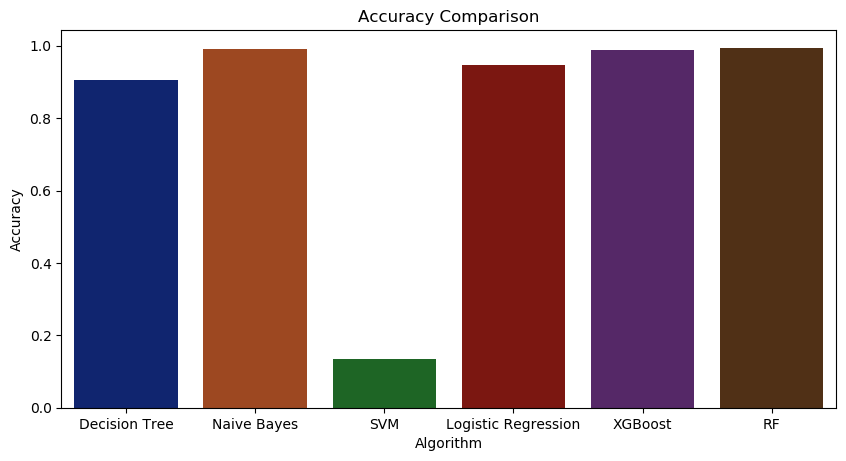

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [ ]:
acc

[0.9045454545454545,
 0.990909090909091,
 0.1340909090909091,
 0.9454545454545454,
 0.9886363636363636,
 0.9931818181818182]

In [ ]:
model

['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'XGBoost', 'RF']